This is a quick script that allows you to save common file to any location with date time appended behind like "filename_1912181212.csv" (`save_dt`). Everytime you want to load it back, just use `load_newest`, it will automatically find the newest file.

Feel free to download/edit this script, and maybe share your version with me!

In [17]:
from file_dt import save_dt, load_newest

import logging
logging.getLogger().setLevel(logging.INFO)

## anything → pkl

In [18]:
data = ['a', 'b', 3]
display(data)

save_dt(data, 'output/data.pkl')

df = load_newest('output/data.pkl')
display(data)

['a', 'b', 3]

INFO:root:output/data_1912181958.pkl saved
INFO:root:output/data_1912181958.pkl loaded


['a', 'b', 3]

## pandas dataframe → csv

In [19]:
import pandas as pd
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
display(df)

save_dt(df, 'output/df.csv')

df = load_newest('output/df.csv')
display(df)

,col1,col2
0,1,3
1,2,4


INFO:root:output/df_1912181958.csv saved
INFO:root:output/df_1912181958.csv loaded


,col1,col2
0,1,3
1,2,4


you can pass any argument as to `pd.DataFrame.to_csv()`, if there's no arguments in `save_dt`, the default will be `index=False`.

For example, `save_dt(df, 'output/df.csv', sep=';')`

## figure → png

INFO:root:output/g_1912181958.png saved


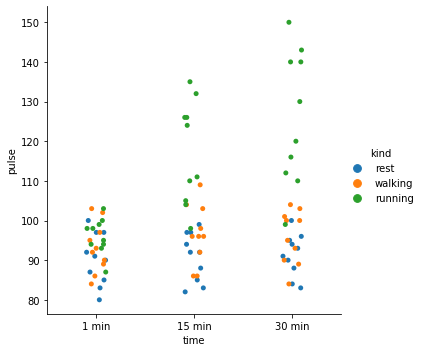

In [20]:
import seaborn as sns
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)
display(g)

save_dt(g, 'output/g.png')

the default arguments will be `dpi=600, bbox_inches: 'tight'`. And it will try to close the fig after saving the file.

## txt

In [21]:
text = '''some random sentences
here
and there'''
display(text)

save_dt(text, 'output/text.txt')

text = load_newest('output/text.txt')
display(text)

'some random sentences\nhere\nand there'

INFO:root:output/text_1912181958.txt saved
INFO:root:output/text_1912181958.txt loaded


'some random sentences\nhere\nand there'

## helper functions

you can save your own file type and load it back using

In [22]:
from file_dt import append_dt
import pickle

output_filename = append_dt('output/sth.pkl', datetime_format="%y%m%d%H%M")[0]
with open(output_filename, 'wb') as f:
    pickle.dump('some strings', f)

In [23]:
from file_dt import find_newest

newest_file = find_newest('output/sth.pkl')[0]
with open(newest_file, 'rb') as f:
    sth = pickle.load(f)
    
print(sth)

some strings
